In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

## Real answer is that the matmethatical model : y = x * 2 + 2
xs : np.array = np.array([1.0, 2.0, 3.0,4.0, 5.0, 6.0], dtype=np.float)
ys : np.array = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=np.float)

model : tf.keras.Sequential = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer = tf.keras.optimizers.SGD(), loss=tf.keras.losses.MeanSquaredError())
#model.fit(xs,ys, epochs=150)


#print(model.predict([10.0]))

#************************************************************************** Multiple Layer Perceptron ( Binary Classification )  ********************************************

df : pd.DataFrame = pd.read_csv("citrus.csv")


print(df.info())
print(df.head(3))
model : tf.keras.Sequential = tf.keras.Sequential([
           keras.layers.Dense(units=1, input_shape=[1]),
           keras.layers.Dense(units=8),
           keras.layers.Dense(units=1) ]
)

df["name"][df["name"] == "orange"] = 0
df["name"][df["name"] == "grapefruit"] = 1

print("\n",df["name"].unique())

#### Convert it to np.arr < Because it sucks with dataframe >
dataset : np.array = df.values
############# Only take the feature & label #######################
X : np.array = dataset[:, 1:]
Y : np.array = dataset[:, 0]
print("X values :", X)
print("Y Values : ",Y[:5])
#######################################################################


############# Normalisasi #######################
min_max_scaler_obj : preprocessing.MinMaxScaler = preprocessing.MinMaxScaler()
x_normalized :  np.array = min_max_scaler_obj.fit_transform(X)
print("Normalized %s " %(x_normalized[1:5]))
#######################################################################

############# Split Dataset #######################
x_train,x_test,y_train,y_test = train_test_split(x_normalized, Y, test_size=0.3,random_state=0 )

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#######################################################################

############ Modelling #######################
neuron_1 : int = 32
neuron_2 : int = 1

model : tf.keras.Sequential = tf.keras.Sequential([
    keras.layers.Dense(neuron_1, 
                       activation=keras.activations.relu,
                       input_shape=(x_normalized.shape[1], )), # (5,)
    keras.layers.Dense(neuron_1,
                       activation=keras.activations.relu),
    keras.layers.Dense(neuron_2,
                       activation=keras.activations.sigmoid)
],name="Model_Ampas")

#######################################################################

############ Compilling #######################
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[
    tf.keras.metrics.BinaryAccuracy()
    ]
)
#history = model.fit(x_train, y_train,epochs=100)
#print(history)
#model.evaluate(x_test,y_test)
# [Loss, Acc]
#######################################################################






C:\Users\User\AppData\Local\Temp\ipykernel_31036\4082302693.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xs : np.array = np.array([1.0, 2.0, 3.0,4.0, 5.0, 6.0], dtype=np.float)
C:\Users\User\AppData\Local\Temp\ipykernel_31036\4082302693.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ys : np.array = np.array([4.0, 6.0, 8.0, 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2

 [0 1]
X values : [[2.96 86.76 172 85 2]
 [3.91 88.05 166 78 3]
 [4.42 95.17 156 81 2]
 ...
 [15.59 256.5 168 82 20]
 [15.92 260.14 142 72 11]
 [16.45 261.51 152 74 2]]
Y Values :  [0 0 0 0 0]
Normalized [[0.07042254 0.00738197 0.66233766 0.55294118 0.01851852]
 [0.10822832 0.04812589 0.53246753 0.58823529 0.        ]
 [0.111

C:\Users\User\AppData\Local\Temp\ipykernel_31036\4082302693.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["name"][df["name"] == "orange"] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_31036\4082302693.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["name"][df["name"] == "grapefruit"] = 1


In [12]:

#************************************************************************** Multiple Layer Perceptron ( Multiple classes Classification )  ********************************************


import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras



######################Preprocessing Basic Bruh################

df : pd.DataFrame = pd.read_csv("Iris.csv")
print(df.info())

df : pd.DataFrame = df.drop("Id",axis=1)

category : pd.DataFrame = pd.get_dummies(df["Species"])

df_new : pd.DataFrame = pd.concat([df, category], axis=1)
df_new = df_new.drop("Species", axis=1)
print(df_new)

####################### Convert to np and then go to the Normalization more !###########################

np_data : np.array = df_new.values
X = np_data[:, :4]
Y = np_data[:, 4:] # Col 5,6,7

# Normalizing
min_max_scale : preprocessing.MinMaxScaler =  preprocessing.MinMaxScaler() # Information of Transformation is in here !
x_normalized : np.array = min_max_scale.fit_transform(X)
print(x_normalized.shape)


## SPLIT the dataset

x_train,x_test,y_train,y_test = train_test_split(x_normalized, Y, test_size=0.3, random_state=1)

#######################################################################

####################### Modelling   ###########################
neuron_1 : int = 64
neuron_2 : int = 3 # Representing the output class
model : tf.keras.Sequential = tf.keras.Sequential([
        tf.keras.layers.Dense(units=neuron_1, activation=tf.keras.activations.relu, input_shape=(x_normalized.shape[1],)), #(4,)
        tf.keras.layers.Dense(units=neuron_1, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(units=neuron_2, activation=tf.keras.activations.softmax)
        
])


class CallbackEz(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("categorical_accuracy") > 0.95):
            print("Akurasi telah mencapai 95%")
            self.model.stop_training = True
    
callbacks = [CallbackEz()]




model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy()
    ]
)
hist = model.fit(x_train,y_train, epochs=100, callbacks=callbacks)
model.evaluate(x_test,y_test)
#######################################################################


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Iris-setosa  \
0              5.1           3.5            1.4           0.2            1   
1              4.9           3.0            1.4           0.2            1   
2              4.7           3.2            1.3           0.2            1   
3              4.6           3.1            1.5           0.2            1   
4              5.0           3.6            1.4           0.2            1   
..       

[0.3573141396045685, 0.9111111164093018]

dict_keys(['loss', 'categorical_accuracy'])


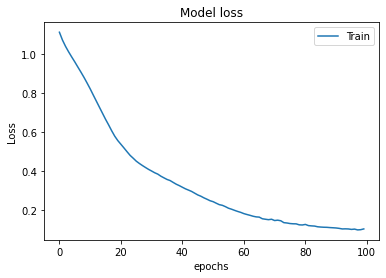

In [8]:
import matplotlib.pyplot as plt
print(hist.history.keys())

plt.plot(hist.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend(["Train"], loc="upper right")
plt.show()

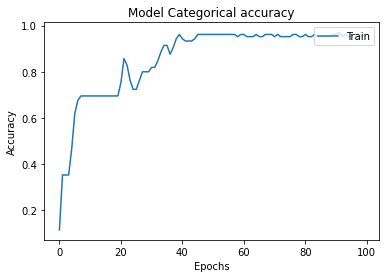

In [11]:
plt.plot(hist.history["categorical_accuracy"])
plt.title("Model Categorical accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train"], loc="upper right")
plt.show()

In [24]:
##### BATCH AND TF.dataSET ######
import tensorflow as tf
from typing import Any
mnist : Any = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()

# Normalizing 0 - 1 
x_train = x_train / 255.0
x_test = y_test / 255.0
print(x_train.shape)

model : tf.keras.Sequential = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(units=32, activation = tf.nn.relu),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units=64, activation =tf.nn.relu),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=10, activation= tf.nn.softmax),

    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Use Sparse Since the output is not like so [0 1 0 0 0 0 0 0], instead [3] [4] [9] 
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
print(y_train[1:5])

# 60000 / 128 = 469 kali melakukan adjusting parameters pada satu epochs
model.fit(x_train, y_train, epochs=100, batch_size=128)



(60000, 28, 28)
[0 4 1 9]
Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.8707 - sparse_categorical_accuracy: 0.7210
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5025 - sparse_categorical_accuracy: 0.8440
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4403 - sparse_categorical_accuracy: 0.8649
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4074 - sparse_categorical_accuracy: 0.8734
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3879 - sparse_categorical_accuracy: 0.8794
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3661 - sparse_categorical_accuracy: 0.8857
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3546 - sparse_categorical_accuracy: 0.8886
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3426 - sparse_categorical_accuracy: 0.8939
Epoch 9/100
46